In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import cv2
from PIL import Image,ImageDraw

In [35]:
def detectFaces(image_name):
    img = cv2.imread(image_name)
    face_cascade = cv2.CascadeClassifier("C:/ProgramData/Anaconda3/Lib\site-packages/cv2/data/haarcascade_frontalface_default.xml")
    #f= open("C:/ProgramData/Anaconda3/Lib\site-packages/cv2/data/haarcascade_frontalface_default.xml",'r')  
    #print(f.read()) 
    if img.ndim == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img #if语句：如果img维度为3，说明不是灰度图，先转化为灰度图gray，如果不为3，也就是2，原图就是灰度图

    faces = face_cascade.detectMultiScale(gray, 1.2, 5)#1.3和5是特征的最小、最大检测窗口，它改变检测结果也会改变
    result = []
    for (x,y,width,height) in faces:
        result.append((x,y,x+width,y+height))
    return result

def saveFaces(image_name):
    faces = detectFaces(image_name)
    if faces:
        #将人脸保存在save_dir目录下。
        #Image模块：Image.open获取图像句柄，crop剪切图像(剪切的区域就是detectFaces返回的坐标)，save保存。
        save_dir = image_name.split('.')[0]+"_faces"
        os.mkdir(save_dir)
        count = 0
        for (x1,y1,x2,y2) in faces:
            file_name = os.path.join(save_dir,str(count)+".jpg")
            Image.open(image_name).crop((x1,y1,x2,y2)).save(file_name)
            count+=1
            
#在原图像上画矩形，框出所有人脸。
#调用Image模块的draw方法，Image.open获取图像句柄，ImageDraw.Draw获取该图像的draw实例，然后调用该draw实例的rectangle方法画矩形(矩形的坐标即
#detectFaces返回的坐标)，outline是矩形线条颜色(B,G,R)。
#注：原始图像如果是灰度图，则去掉outline，因为灰度图没有RGB可言。drawEyes、detectSmiles也一样。
def drawFaces(image_name):
    faces = detectFaces(image_name)
    if faces:
        img = Image.open(image_name)
        draw_instance = ImageDraw.Draw(img)
        for (x1,y1,x2,y2) in faces:
            draw_instance.rectangle((x1,y1,x2,y2), outline=(255, 0,0))
        img.save('drawfaces_'+image_name)
 
        # data =  np.fromstring(img, np.uint8)
        #img_data =  cv2.imdecode(img, cv2.IMREAD_COLOR )
        #img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()            

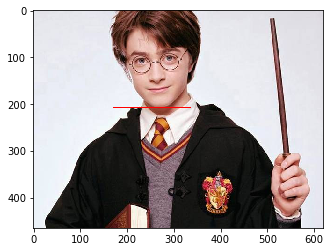

In [38]:
drawFaces('test.jpg')